In [29]:
pip install langgraph langchain langchain_openai

In [18]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [30]:
""" BMI calculator Workflow
Height & Weight are two inputs
You calculate BMI based on that
Here our state will have 3 variables, weight, height and bmi"""

from typing import TypedDict
# Define State
class BMIState(TypedDict):
  weight_kg: float
  height_m: float
  bmi: float
  category: str

In [21]:
def calculate_bmi(state: BMIState) -> BMIState:
  weight = state['weight_kg']
  height = state['height_m']
  bmi = weight/(height**2)
  state['bmi'] = round(bmi, 2)
  return state



In [22]:
def label_bmi(state:BMIState) -> BMIState:
  bmi = state['bmi']
  if bmi >18.5:
    state['category'] = "Underweight"
  elif 18.5 <=bmi <25:
    state["category"] = "Normal"
  elif 25 <= bmi <30:
    state["category"] = "Overweight"
  else:
    state["category"] = "Obese"
  return state

In [24]:
# define your graph
graph = StateGraph(BMIState)

# Add Nodes to graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# Add Edges to graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

# Compile the graph
workflow = graph.compile()




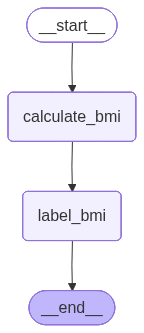

In [31]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [25]:
# Execute the graph
initial_state = {'weight_kg': 80, 'height_m':1.73}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Underweight'}
